# Introduction to Python - Class 2
This notebook covers a few new topics that we will be using in our second class: 
  - Basic plotting
  - The `numpy` library
  - Creating very simple functions

<font color=blue>For some sections below, we will give you suggestions in blue of what kind of prompts you may try with a chatbot to get it to accomplish that task. These prompts assume that the chatbot knows that you are looking for Python code. To achieve that, you could use a dedicated Python bot (for instance, I use Nicholas Barker's Python bot in ChatGPT-4o) or you could simply given the bot some context at the very start of the thread that tells it you need Python, e.g., _"I need help with python coding and I will ask you several questions that all pertain to python_".</font>



Let's start by reading in some data...

In [1]:
import pandas as pd

# Read the data from a file and have a quick look at the first 5 rows.
df = pd.read_csv("market_data.csv", index_col=0)

# print first five rows
df.head(5)

,Cost,Price,Demand
Sample,,,
1,2.20,9.68,266.19
2,3.00,11.15,210.50
3,1.91,9.50,270.98
4,1.45,9.31,279.79
5,1.21,10.27,235.30


This data contains three columns:
 - **Cost** : the cost for purchasing inputs.
 - **Price** : the price that the company charges for its products.
 - **Demand** : the demand for the company's products.

Let's do some visualizations of this data.

# Plotting
Let's import a module that allows for very nice plotting: `matplotlib`. We also import a sub-package from `matplotlib` called `pyplot`.

In [2]:
# import packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

_The matplotlib module gives you the functionality to create some very sophisticated and involved plots. We're not going to cover that in this class - we just want you to be able to create some basic plots to visualize your data and results. [This tutorial](https://matplotlib.org/users/pyplot_tutorial.html) gives a great introduction to other attributes of these simple plots and many other resources and tutorials can be found online._ <br>

<font color=blue>Most importantly, **AI bots are very versed in plotting, so you should use them extensively!** If the plot is not exactly what you want, try iterating with the bot. Typically, with good prompting and a few iterations, you should get exactly what you need.</font>

In OIT 248, we will be plotting mainly histograms, scatter plots, and line plots.

## Histograms
Let's plot a **histogram** of the **cost**.

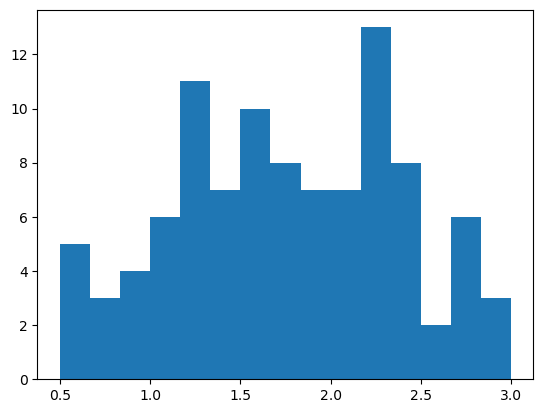

In [3]:
# We can produce a simple histogram :
plt.hist(df["Cost"], bins=15) 
plt.show()

<font color=blue>Try prompting a chatbot with something like: _"Can you give me code that plots a histogram?"_ If you have a more specific use case, like plotting a column of a dataframe or a list, you could also include that in the prompt.</font>

Here is how you can label the x and y axes, add a title, and change the fonts.

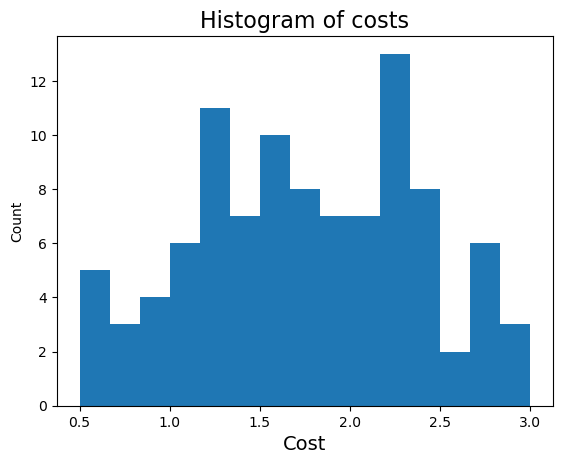

In [4]:
# Label the two axes
plt.hist(df["Cost"], bins=15) 
plt.ylabel("Count")
plt.xlabel("Cost",fontsize=14)
plt.title( "Histogram of costs",fontsize=16)
plt.show()

We can also change the number of 'bins' or bars in our graph, and change the color of the bars:

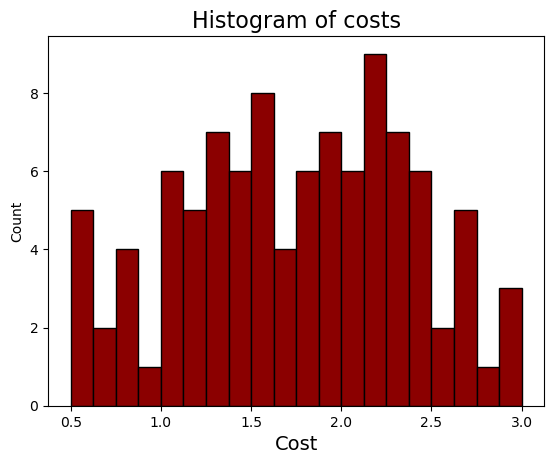

In [5]:
# Change bins, color the bars
plt.hist(df["Cost"], bins=20, color="darkred", edgecolor="black")
plt.ylabel("Count")
plt.xlabel("Cost",fontsize=14)
plt.title( "Histogram of costs",fontsize=16)
plt.show()

<font color=blue>Try prompting a chatbot with something like: _"How to change the label for the x-axis and y-axis or the title of the plot?_" or "_How to change the size of the fonts in a plot?_"</font>

## Scatter Plots
Let's try a scatter plot showing how the **demand** depends on the **price**.

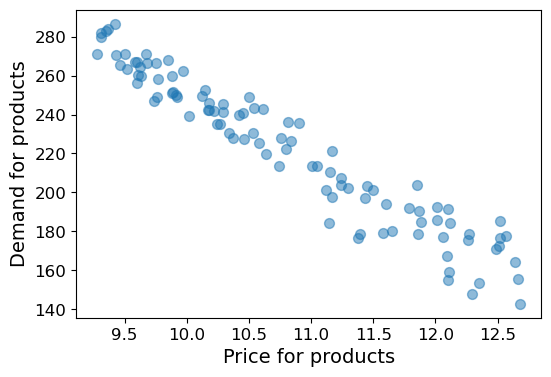

In [6]:
# Scatter plot of price and demand
plt.figure(figsize=(6,4)) 
plt.scatter(x=df["Price"], y=df["Demand"], marker='.', s=200, \
            alpha=0.5)
plt.xlabel("Price for products", fontsize=14)
plt.ylabel("Demand for products", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

The code above shows you a few more parameters and tricks:
 - `plt.figure` allows you to adjust the figure size
 - `marker` specifies what marker to use for the points ('.' is a circle)
 - `s` specifies the size of the marker
 - `alpha` makes the markers more or less visible
Also note how we can change the fontsize for the x/y labels, or for the x/y ticks on the axes.

## Line Plot
Let's now add a line plot showing a potential demand function. Suppose we use the demand function:<br>
 $\mbox{Demand} = 600  - 35 \cdot \mbox{Price for cocoa powder} (\$/\mbox{pound})$

First, we calculate the predicted demand from the equation.

In [7]:
# Calculate predicted demand
y_predicted = [ 600 - 35 * price for price in df["Price"] ]

Note how above, we are looping with `price` through all the values in the column of prices! Python magic!

Next, let's create the plot.

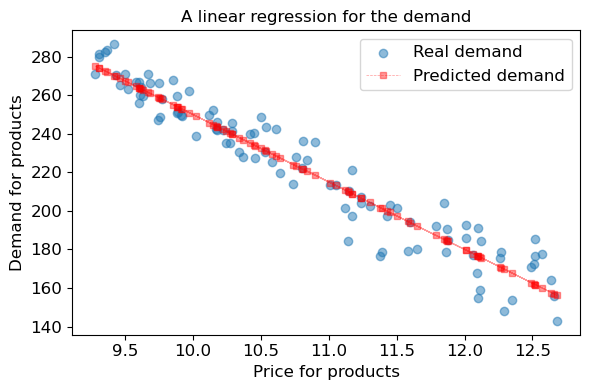

In [8]:
# create a new figure
plt.figure(figsize=(6,4)) 

# do the scatter plot first
plt.scatter(x = df["Price"], y = df["Demand"],\
            marker = 'o', alpha = 0.5)   # scatter plot

# then plot the fitted line
plt.plot(df["Price"],  y_predicted, color='red', linestyle='dashed', \
         linewidth=0.5, marker = 's', markersize = 5, alpha = 0.4 )

# nice labels
plt.title( "A linear regression for the demand")
plt.xlabel("Price for products", fontsize=12)
plt.ylabel("Demand for products", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# and even a legend
plt.legend(['Real demand', 'Predicted demand'], fontsize = 12)
plt.tight_layout()
plt.show()

Note how you can adjust many parameters for the line: 
 - `color` : self-explanatory...
 - `linestyle` : dashed, solid, dotted
 - `linewidth` : how thick the line should be
 - `marker` : what marker to use (here, we use a square)
 - `markersize` : size of the market
 - `alpha` : visibility

There are many more things you can adjust, but don't bother remembering these. AI Chatbots are the way to go!

<font color=purple>**Note.** The line we plotted above is not quite the "best fit", but it is very close (we rounded the values!) Your D&D class will discuss a lot more about linear regression and related topics; in OSM, we will usually take such predictive models as given and proceed from there.</font>

## Multiple Subplots

If you ever need to, you can also do multiple subplots as part of the same figure. One way is to use the function `subplot(.)` within `pyplot`, with syntax:
 > `subplot(nrows,ncols,index)`
 - `nrows`: Number of rows in the subplot grid.
 - `ncols`: Number of columns in the subplot grid.
 - `index`: The position of the current plot in the grid (counting starts at 1, left to right, top to bottom).

Here is an example, but you do not need to remember any of this (chat-bots are the way to go here!)

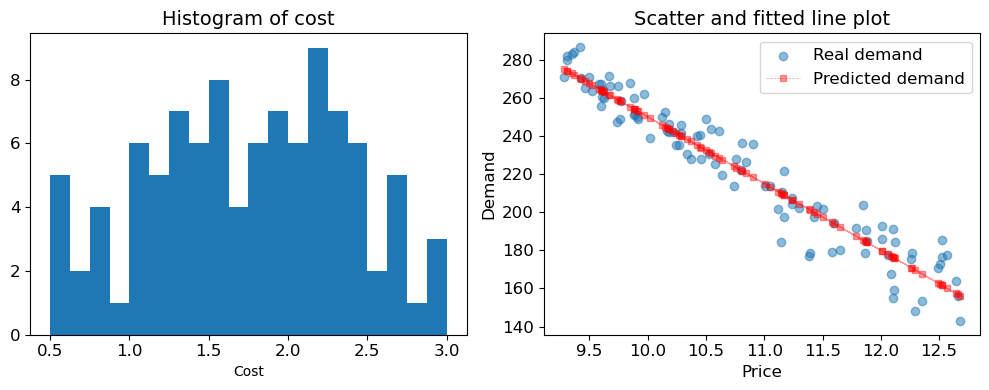

In [9]:
# create a new figure
plt.figure(figsize=(10,4)) 

# the histogram
plt.subplot(1,2,1)     # <--- we are specifying 1 row, 2 columns, and selecting the first figure (i.e., the one on the left)
plt.hist(df["Cost"], bins=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.ylabel("Count")
plt.xlabel("Cost")
plt.title( "Histogram of cost",fontsize=14)

# the scatter plot and the line plot
plt.subplot(1,2,2)     # <--- same 1 row, 2 columns, and now selecting the second figure (i.e., the one on the right)

# Calculate predicted demand
intercept = 600
slope = -35
y_predicted = [ intercept + slope * price for price in df["Price"] ]

plt.scatter(x = df["Price"], y = df["Demand"],\
            marker = 'o', alpha = 0.5)   # scatter plot
plt.plot(df["Price"],  y_predicted, color='red', linestyle='dashed', \
         linewidth=0.5, marker = 's', markersize = 5, alpha = 0.4 )  # line plot

# nice labels
plt.xlabel("Price", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.title( "Scatter and fitted line plot",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(['Real demand', 'Predicted demand'], fontsize = 12)
plt.tight_layout()
plt.show()

<font color=blue>Try prompting a chatbot with something like: _"How can I create one figure that contains multiple subplots"_ (you can be more specific if you know exactly how many or how many rows/columns you want)</font>

# Numpy
NumPy is a powerful Python library used for numerical computations. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. Although numpy's functionality can be replicated in principle with lists of lists, numpy is **a lot** faster than lists (about 50 times faster) and should always be used instead of lists for large-scale computations.

Let's import this library.

In [10]:
# import the numpy library
import numpy as np

## Creating Arrays
NumPy arrays can be created using the `array` function. Here's a basic example of creating an array from a list:

In [11]:
# Creating an array
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


You can also create `numpy` arrays from other objects. From instance, from a `range` or a `dataframe`:

In [12]:
# create array from range
arr2 = np.array(range(5))
print("\nHere is an array from a range:\n", arr2)

# create array from a dataframe column
arr3 = np.array(df["Cost"])
print("\nAn array from a dataframe column\n", arr3)


Here is an array from a range:
 [0 1 2 3 4]

An array from a dataframe column
 [2.2  3.   1.91 1.45 1.21 1.72 1.08 1.98 0.5  1.78 1.75 2.34 1.25 1.89
 1.24 0.6  2.2  1.59 0.5  1.28 1.6  2.67 2.68 2.36 0.5  0.62 1.56 2.69
 0.74 2.81 0.85 2.21 2.21 2.25 2.18 0.88 1.39 2.57 2.23 1.3  2.91 3.
 2.48 0.84 1.28 2.41 2.45 2.38 1.24 0.85 1.49 2.7  1.95 2.03 1.95 2.02
 2.33 1.45 1.67 2.04 1.39 1.41 1.21 1.32 1.28 1.52 2.1  1.81 2.1  2.01
 1.94 0.82 1.81 1.94 1.65 1.82 2.21 1.1  1.64 2.42 1.61 2.71 2.18 2.58
 1.34 2.44 1.57 1.01 1.01 2.26 1.81 1.51 1.2  1.58 2.15 0.71 2.25 1.08
 1.1  2.31]


A special function is worth mentioning here: `zeros` creates arrays initialized with the value 0.

For instance, the next code creates a NumPy array called `New_arr` with a length of 100 and all elements are initialized to 0.

In [13]:
# create array with zeros
New_arr = np.zeros(100)

# print it
print(New_arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Indexing
You can access elements of a NumPy array using indexing, similar to lists. Remember that indexing starts at 0.

In [14]:
# Accessing elements
print(arr[0])  # First element
print(arr[2])  # Third element

1
3


## Slicing
Slicing allows you to extract a portion of an array. The syntax is similar to Python lists: `arr[start:stop]`.

In [15]:
# Slicing an array
print(arr[1:4])  # Elements from index 1 to 3

[2 3 4]


## Iterating
You can iterate over numpy arrays using standard loops.

In [16]:
# Iterating through an array
for x in arr:
    print(x)

1
2
3
4
5


## Sorting
Numpy provides a simple way to sort arrays using the `sort` function.

In [17]:
# Sorting an array
unsorted_arr = np.array([3, 1, 4, 1, 5])
sorted_arr = np.sort(unsorted_arr)
print(sorted_arr)

[1 1 3 4 5]


## Max, Argmax, Min, and Argmin


The `numpy` library provides the **functions** `numpy.min(), numpy.max(), numpy.argmin(), numpy.argmax()`, which allow you to find the minimum and maximum value and the location (i.e. index) of the minimum and maximum, respectively, in any object passed as argument. Here is an example where we apply these functions directly to a dataframe column:

In [18]:
# calculate the max, min, argmax, argmin directly for a DataFrame column
column_name = "Cost"
print(f"Maximum value in column {column_name} is {np.max(df[column_name])} and it is found at index {np.argmax(df[column_name])}.")
print(f"Maximum value in column {column_name} is {np.min(df[column_name])} and it is found at index {np.argmin(df[column_name])}.")

Maximum value in column Cost is 3.0 and it is found at index 1.
Maximum value in column Cost is 0.5 and it is found at index 8.


These are very versatile functions: you can also apply these to a list or any other object whose elements can be sorted and compared. 

Here is an example with a list:

In [19]:
np.max([2, 4, 5, 1])

5

In [20]:
np.argmax([2, 4, 5, 1])

2

<font color=blue>Try prompting a chatbot with something like: _"How can I find the maximum in a numpy array?"_ or _"How can I find the location of a maximum in a numpy array?"_</font>

## Logical Conditions
Numpy is very powerful at determining when a logical condition holds. You can simply use a logical condition involving the array and you will get another array with `True/False` depending on whether the condition holds for each element of the array.

For instance, let's determine whether the cost exceeds 2.

In [21]:
# a numpy array to store the cost column
cost_values = df["Cost"]

# this creates an array that has True/False when the cost exceeds 2
cost_exceeds_2 = (cost_values > 2)

# let's print the costs and this so we can see
print(df["Cost"])
print(cost_exceeds_2)

Sample
1      2.20
2      3.00
3      1.91
4      1.45
5      1.21
       ... 
96     0.71
97     2.25
98     1.08
99     1.10
100    2.31
Name: Cost, Length: 100, dtype: float64
Sample
1       True
2       True
3      False
4      False
5      False
       ...  
96     False
97      True
98     False
99     False
100     True
Name: Cost, Length: 100, dtype: bool


As a side note, this is also possible to do with `pandas` itself. For instance, we can construct another column in the dataframe that stores such 'True/False' with this syntax:

In [22]:
df["Cost_exceeds_2"] = (df["Cost"] > 2)
df.head(5)

,Cost,Price,Demand,Cost_exceeds_2
Sample,,,,
1,2.20,9.68,266.19,True
2,3.00,11.15,210.50,True
3,1.91,9.50,270.98,False
4,1.45,9.31,279.79,False
5,1.21,10.27,235.30,False


## Simple Statistics
The numpy library also allows calculating very simple statistics. For instance, you can quickly calculate the mean of an array with `numpy.mean(.)` and the covariance with `numpy.cov(.)`.

Let's calculate the mean cost:

In [23]:
# mean cost
mean_cost = np.mean(df["Cost"])
print(f'The mean cost: {mean_cost:.2f}')

The mean cost: 1.75


Let's calculate the standard deviation of the price:

In [24]:
# standard deviation of cost
stdev_cost = np.std(df["Cost"])
print(f'The standard deviation of cost: {stdev_cost:.2f}')

The standard deviation of cost: 0.62


You can also calculate a variance matrix between several arrays. 

For instance, here's the covariance matrix of the cost and price:

In [25]:
# covariance matrix 
cov = np.cov(df["Cost"], df["Price"])
print(cov)

[[0.39391793 0.08316778]
 [0.08316778 1.05202428]]


This allows calculating the correlation coefficients as well. However, the `pandas` function for correlation coefficients is simpler here:

In [26]:
# Calculate and print the correlation 
corr_coef = df["Price"].corr(df["Demand"])
print(f"Correlation coefficient price-sales: {corr_coef:.3f}")

Correlation coefficient price-sales: -0.964


<font color=blue>Try prompting a chatbot with something like: _"How can I get the mean and standard deviation of the values in a numpy array?"_ (And you can obviously change that to a list or a dataframe column depending on the use case.)</font>

## Arange
Much like `range`, the `arange` function allows creating an array with evenly spaced values within a given range. But `arange` is much more flexible because it allows the `start`, `stop` or `step` to be fractional values (whereas with `range` they must be integers!)

In [27]:
# Using arange
start = 0.1
stop = 10.5
step = 2.2
range_arr = np.arange(start, stop, step)
print(range_arr)

[0.1 2.3 4.5 6.7 8.9]


You will often be interested in calculating various statistics from data. The `pandas` library has many useful built-in functions for that. For instance, you can quickly calculate **the correlation coefficient** using the `corr` method. Here is how to calculate the correlation between sales and price:

# Defining Functions
Functions allow organizing the code in blocks that can be called separately (and many times). A function can take several arguments and can return data as a result. In Python, functions are defined using the `def` keyword.

Let's define a function with no arguments that prints a message.

In [28]:
# define a function without any arguments
def hello():
    print("Hello again!")

To call this function, we would just do:

In [29]:
# call the function
hello()

Hello again!


Now let's define some smarter functions:
 - a function that adds its two arguments
 - a function that returns the sum, the difference, and a list with the two values.

In [30]:
# A function that adds its two arguments
def my_smart_addition(a,b):
    return a+b

To test, let's add 2 and 5

In [31]:
# this function returns something; let's store and print the result!
result = my_smart_addition(2,5)
print(f"The function returns 2 + 5 = {result}")

The function returns 2 + 5 = 7


## Functions That Return Many Values

Functions can return many values. Here, we define a function that returns a+b, a-b, and also a*b

In [32]:
# A smarter function that returns a+b and a-b as a list
def my_smartest_function(a,b):
    a_plus_b = a+b
    a_minus_b = a-b
    a_times_b = a*b
    return a_plus_b, a_minus_b, a_times_b

In this case, because the function returns 3 things, we have a few options to collect the output of the function:
 1. we can assign a single variable; then, that variable with be a tuple that contains all the returned values
 2. we can assign as many variables as there are return values (here, 3)

Here is how to do this with option 1, with a single return variable.

In [33]:
# assign a single variable
all_results = my_smartest_function(2,5)
print(all_results)

# in this case, if we need access to an individual value, we can index into `all_results`
print(f"The first returned value is {all_results[0]}.")
print(f"The second returned value is {all_results[1]}.")

(7, -3, 10)
The first returned value is 7.
The second returned value is -3.


Here is the second option, where we directly assign all the 3 return values. 

In [34]:
# assign all 3 return variables
v1, v2, v3 = my_smartest_function(2,5)
print(v1, v2, v3)

7 -3 10


With the second option, we obviously need to be careful to use the correct number of variables so as to match the number of values returned by the function. 

For instance, if we just used two, we would get an error:

In [35]:
# assign only 2 return variables although the function returns 3 --> ERROR!
v1, v2 = my_smartest_function(2,5)
print(v1, v2)

ValueError: too many values to unpack (expected 2)

## Positional and Keyword Arguments
When calling a function in Python, you can pass arguments by **position** (positional arguments) or **by explicitly specifying the name of the parameter** (keyword arguments). The latter allows you to assign values to specific parameters, making the function call clearer and often more flexible. And it is extremely useful when dealing with functions that have many arguments in their call. 

For instance, let's define a function that agreets someone.

In [36]:
def greet(name, age):
    print(f"Hello, {name}. You are {age} years old.")

We can now call the function using the standard **positional** approach: 

In [37]:
greet("John",30)

Hello, John. You are 30 years old.


In this case, we need to be careful that the position/order of arguments in the call matches the arguments of the function. 

Instead, we could call the function using **keyword arguments**, as follows:

In [38]:
# Calling the function with keyword arguments
greet(name="Alice", age=30)

Hello, Alice. You are 30 years old.


This is very simple: you just have to give an assignment for each argument that the function expects, and you do that inside the call of the function. Note how we're assigning the variable `name` to the value "Alice" and the variable `age` to value 30. The really nice thing about **keywork arguments** is that **you don't have to worry about the order in which you specify the arguments** because the variables are matched based on their names. For instance:

In [39]:
# Calling the function with keyword arguments in a different order
greet(age=30, name="Alice")

Hello, Alice. You are 30 years old.


You can even mix positional and keyword arguments in a function call, but **positional arguments must always come first!**

In [40]:
# Calling the function with keyword arguments in a different order
greet("Alice", age=20)

Hello, Alice. You are 20 years old.


In contrast, this produces an error:

In [41]:
# Calling the function with keyword argument before positional argument ---> error !
greet(name="Alice", 30)

SyntaxError: positional argument follows keyword argument (3898863933.py, line 2)

<font color=red>A few important things to remember about defining functions:</font>
 - <font color=red> The colon `:` is critical in the syntax (just like with `if` and `for`)</font>
 - <font color=red> Functions can take arguments</font><br>
   <font color=red> _for instance, the second function takes as arguments two things a, b. These could be any data type._</font>
 - <font color=red> The keyword `return` tells the function what value to return </font><br>
   <font color=red>_for instance, the second function returns the sum of its arguments, a + b_</font>
 - <font color=red>You can return several values; you should be careful to have the correct number of variables to match these return values!</font><br>
 - <font color=red>You can use keyword arguments when calling the function.</font>

<font color=red>Lastly, you need to be very careful with the treatment of local and global variables. This issue is important enough that we devote separate section to it.</font>

## Important Note About Local vs Global Variables

<font color=red>A critical thing to be mindful about with functions is the handling of **local** variables and **global** variables. **Local** variables are those variables defined within a function or passed as arguments to a function. **Global** variables are those defined outside the function. If a variable that is used inside a function was not passed as an explicit argument to the function and was not defined inside the function, then it will be interpreted as a global variable. For instance, consider the following example:</font>

In [42]:
# Let's define a global variable called 'a'
a = 100

# Let's define a function that uses 'a' inside it without passing it as an argument
def print_value():
    print(f"The value of the global variable a is {a}")  # we are using 'a' here !

print_value()

The value of the global variable a is 100


Note that the function works and it prints the value of the global variable `a`. This could work well, but you have to make sure that it corresponds to your intended behavior: this function will print the (global) value of `a` that is outstanding. So you will not have much control over which `a` is passed/used inside the function. And you also won't be able to change the value of `a` inside the function. Doing so may generate an error, depending on the use case.

Consider now the following example:

In [43]:
# Let's define a global variable called 'a'
a = 100

# Let's define a function that takes 'a' as argument and even changes the value of 'a' inside it
def print_value_2():
    a = 45   # <-- we are changing the value of a here; but note that this means a is now treated as a local variable!!
    print(f"The value of the variable a is {a}")  # this is now the 'local' value of 'a'

# Let's call our function
print_value_2()

# Let's print the value of 'a'  -- this time, it will be the **global** a
print(f"The value of a after all of this is {a}")

The value of the variable a is 45
The value of a after all of this is 100


In `print_value_2`, `a` is viewed as a **local** variable because it is defined inside the function. The moment Python sees a statement like `a = ...` inside the function, it assumes that `a` is a local variable and treats it as such. When the function returns, we are back in the global domain and the value of `a` is again 100.

Mixing local and global variables in this way can result in somewhat perplexing results and is **NOT ADVISED**. Just to show you what can happen, consider the following code:

In [44]:
# Let's define a global variable called 'a'
a = 100

# Let's define a function that print 'a' and then changes it and prints it again
def print_value_2():
    print(f"Initially, the value of a is {a}")
    a = 45   # <-- we are changing the value of a here
    print(f"The new value of the variable is {a}")  # this is now the 'local' value of 'a'

# Let's call our function
print_value_2()

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

This leads to an error! You might wonder what is going on; to understand this, remember the rule: the moment Python sees the code `a = 45` inside the function, it treats `a` as a **local** variable. So the first time you are using `a` in the print(.) on line 6, the function says that `a` is not defined. So in other words, it does **NOT** attempt to get the global value of `a` and use it there! 

In contrast, if you pass an argument to the function called `a`, the function will use whatever argument is passed rather than the global variable, and you could even be able to modify that argument inside the function (albeit still with local effects!). For instance:

In [45]:
# Let's define a global variable called 'a'
a = 100

# Let's define a function that takes 'a' as argument and even changes the value of 'a' inside it
def print_value_3(a):
    print(f"Initially, the value of a is {a}")
    a = 45   # <-- we are changing the value of a here
    print(f"The new value of the variable is {a}")  # this is now the 'local' value of 'a'

# Let's call our function
print_value_3(a)

# Let's print the value of 'a'
print(f"The value of a after all of this is {a}")

Initially, the value of a is 100
The new value of the variable is 45
The value of a after all of this is 100


In the example above, the variable `a` inside the function is again treated like a **local variable**; this allows it to be printed, modified, etc. But once the function returns, we are back in the global domain and are dealing with the **global** variable `a`. 

<font color=red> Always remember this difference between **local** and **global** variables!